       Can_you_rate_your_experience_adjusting_parameters_from_a_scale_of_1-10  \
count                                          10.000000                        
mean                                            7.900000                        
std                                             1.595131                        
min                                             6.000000                        
25%                                             7.000000                        
50%                                             7.500000                        
75%                                             9.500000                        
max                                            10.000000                        

       Can_you_rate_your_experience_using_the_database_functionality_from_a_scale_of_1-10  \
count                                          10.000000                                    
mean                                            8.000000                            

/tmp/ipykernel_70363/1411447406.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


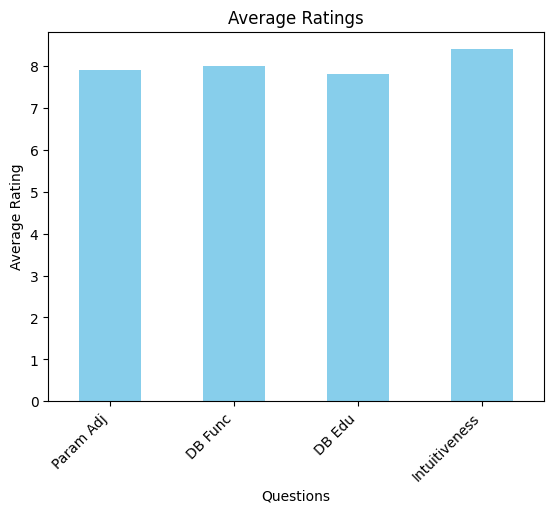

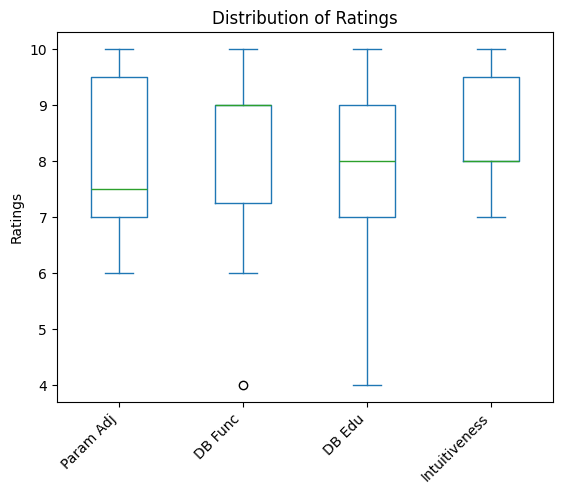

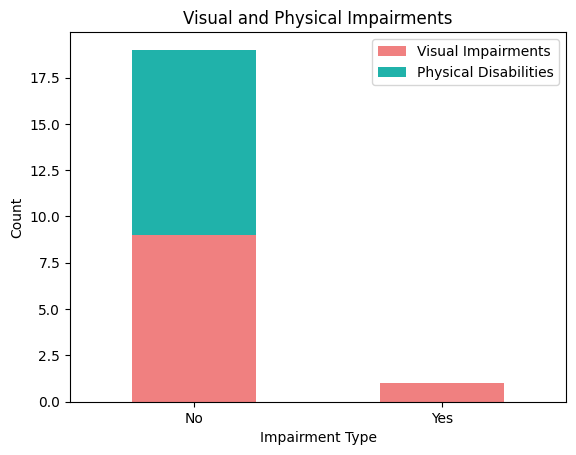


UI Improvement Suggestions:
- Change text colours to be bolder in comparison to background
- sliders for changing the parameters, the green text on green background makes the text less clear 
- Easy to use doesnt mean intuitive, implement zoom on the actual thing

- The colours do not work together. It is too flat, and the text boxes are too small and square. there needs more modernity in the website.
- The numbers in the database are difficult to interpret. If there were a way to differentiate between the entries in the table in a meaningful manner (e.g. if we could name them of if they could be presented with some kind of preview), that would be nice :)
- I'd like the Mandelbrot viewer to be larger
- Make font sizes bigger so they're easier to see
- Use different theme
- Make it more visually appealing by making it look more modern, perhaps softer curves and more readable fonts.
- I would increase the size of the table relative to the inputs. I would also make the zoom factor a larg

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/alexubuntu/Documents/EE2-Project/Subjective_Testing/Subjective_Testing_Data.csv')

# Clean the column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('?', '').str.replace('\"', '')

# Convert the timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Display basic statistics
print(df.describe())

# Average ratings for each question
short_labels = {
    "Can_you_rate_your_experience_adjusting_parameters_from_a_scale_of_1-10": "Param Adj",
    "Can_you_rate_your_experience_using_the_database_functionality_from_a_scale_of_1-10": "DB Func",
    "On_a_scale_from_1-10,_how_effective_was_the_database_functionality_for_bolstering_the_educational_experience": "DB Edu",
    "From_a_scale_of_1-10,_how_intuitive_was_the_design_for_you": "Intuitiveness"
}

ratings_columns = list(short_labels.keys())

# Average ratings for each question
average_ratings = df[ratings_columns].mean()
average_ratings.index = [short_labels[col] for col in average_ratings.index] 
average_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings')
plt.ylabel('Average Rating')
plt.xlabel('Questions')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of ratings
df_short = df[ratings_columns].rename(columns=short_labels)
df_short.plot(kind='box')
plt.title('Distribution of Ratings')
plt.ylabel('Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

short_impairments_labels = {
    "Do_you_have_any_visual_impairments": "Visual Impairments",
    "Do_you_have_any_physical_disabilities": "Physical Disabilities"
}

# If user has visual or physical impairments
impairments = df[["Do_you_have_any_visual_impairments", "Do_you_have_any_physical_disabilities"]].apply(pd.Series.value_counts)
impairments.index = ['No', 'Yes']  # Assuming the responses are 'Yes' or 'No'
impairments = impairments.rename(columns=short_impairments_labels)
impairments.plot(kind='bar', stacked=True, color=['lightcoral', 'lightseagreen'])
plt.title('Visual and Physical Impairments')
plt.ylabel('Count')
plt.xlabel('Impairment Type')
plt.xticks(rotation=0)
plt.show()

# Suggestions for UI improvement
print("\nUI Improvement Suggestions:")
for suggestion in df["If_you_could_improve_the_UI,_how_would_you"].dropna():
    print(f"- {suggestion}")
